In [ ]:
!python -m spacy download pt_core_news_sm

## Statistical Overview of Issues

Compare all issues with the conversational issues. Conversational issues contain some specific words ('conversa|utter|intent|resposta|mensagem').

In [ ]:
import pandas as pd

df_all = pd.read_csv('issues_chatbot.csv')
df = pd.read_csv('issues_conversacionais.csv')

column_name = 'Repository'

value_counts_df1 = df_all[column_name].value_counts().sort_index()
value_counts_df2 = df[column_name].value_counts().sort_index()

comparison = pd.concat([value_counts_df1, value_counts_df2], axis=1)
comparison.columns = ['All', 'Conversational']

comparison_sorted = comparison.sort_values(by='Conversational', ascending=False)

print(f"Comparison for column '{column_name}':")
print(comparison_sorted)

Comparison for column 'Repository':
                     All  Conversational
2019.1-Aix           245              81
2019.1-PyLearner     184              47
2019.1-ADA           165              37
2019.2-GloriaBot     104              28
2021.1-AlligaBot     264              27
2019.2-Chatbot-Nilo   54              19
2019.1-Gaia          183              17
2019.1-Ludum         137              13
2019.1-Tino           64               9
2022-2-Bote           31               6
2020.1-DoctorS-Bot    61               2


## Characterizing Conversational Issues

- Columns
- List of repositories and number of issues

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  286 non-null    int64 
 1   Repository  286 non-null    object
 2   Title       286 non-null    object
 3   Body        286 non-null    object
 4   Link        286 non-null    object
dtypes: int64(1), object(4)
memory usage: 11.3+ KB


In [ ]:
df['Body'] = df['Body'].astype(str)
df['Body']

0      ## Descrição da Issue\r\nAo cadastrar um usuár...
1      ## Descrição da Issue\r\nEssa issue nasce do r...
2      ## Descrição da Issue\r\nDeve-se criar métodos...
3      ## Descrição da Issue\r\nConforme notado no #2...
4      ## Descrição da Issue\r\nNo teste em uso reali...
                             ...                        
281    **Melhorar fluxo de conversa de origens da vio...
282    Nesta issue deverá ser feito:\n- [x] implement...
283    **Melhorar  Fluxo de conversa de Quem agride e...
284    **Melhorar fluxo de conversa de orientações so...
285    **Melhorar fluxo de conversa de delegacias da ...
Name: Body, Length: 286, dtype: object

In [ ]:
df['Repository'].value_counts()

2019.1-Aix             81
2019.1-PyLearner       47
2019.1-ADA             37
2019.2-GloriaBot       28
2021.1-AlligaBot       27
2019.2-Chatbot-Nilo    19
2019.1-Gaia            17
2019.1-Ludum           13
2019.1-Tino             9
2022-2-Bote             6
2020.1-DoctorS-Bot      2
Name: Repository, dtype: int64

## Issues Pattern Identification

Identify common texts inside issues.

In [ ]:
import pandas as pd
from collections import Counter

grouped = df.groupby('Repository')

for repository, group in grouped:

    all_issues = ' '.join(group['Body'])
    words = all_issues.lower().split()
    substring_counter = Counter()

    for i in range(len(words)):
        for j in range(2, 15):
            substring = ' '.join(words[i:i+j])
            substring_counter[substring] += 1

    threshold = 0.7 * len(group)

    common_substrings = [substring for substring, count in substring_counter.items() if count >= threshold]

    print("Repository:", repository)
    print("Common Substrings:")
    for substring in common_substrings:
        print("\t", repr(substring))
    print()


Repository: 2019.1-ADA
Common Substrings:
	 '## descrição'
	 '## descrição da'
	 '## descrição da issue'
	 'descrição da'
	 'descrição da issue'
	 'da issue'
	 'a ada'
	 '### tasks:'
	 '### tasks: -'
	 '### tasks: - [x]'
	 'tasks: -'
	 'tasks: - [x]'
	 '- [x]'
	 '### critérios'
	 '### critérios de'
	 '### critérios de aceitação'
	 '### critérios de aceitação -'
	 '### critérios de aceitação - [x]'
	 'critérios de'
	 'critérios de aceitação'
	 'critérios de aceitação -'
	 'critérios de aceitação - [x]'
	 'de aceitação'
	 'de aceitação -'
	 'de aceitação - [x]'
	 'aceitação -'
	 'aceitação - [x]'
	 'fluxo de'
	 'fluxo de conversa'
	 'de conversa'

Repository: 2019.1-Aix
Common Substrings:
	 '**tarefas** -'
	 '**critérios de'
	 '**critérios de aceitação**'
	 '**critérios de aceitação** -'
	 'de aceitação**'
	 'de aceitação** -'
	 'aceitação** -'
	 '**tarefas** - [x]'
	 '- [x]'
	 '**critérios de aceitação** - [x]'
	 'de aceitação** - [x]'
	 'aceitação** - [x]'
	 'capaz de'
	 'conteúdo refe

## Pre-processing for Word Analysis

Cleaning issues text:
- Lower case
- Remove numbers and special characters

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df_clean = df

df_clean['Body'] = df['Body'].apply(clean_text)
df_clean['Body']

0       descrição da issue ao cadastrar um usuário no...
1       descrição da issue essa issue nasce do result...
2       descrição da issue devese criar métodos para ...
3       descrição da issue conforme notado no teste e...
4       descrição da issue no teste em uso realizado ...
                             ...                        
281    melhorar fluxo de conversa de origens da violê...
282    nesta issue deverá ser feito x implementado o ...
283    melhorar fluxo de conversa de quem agride e qu...
284    melhorar fluxo de conversa de orientações sobr...
285    melhorar fluxo de conversa de delegacias da mu...
Name: Body, Length: 286, dtype: object

## Word Usage Analysis

Identify the most used words according to grammatical class. In addition, group similar verbs into requirement categories.

In [ ]:
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nlp = spacy.load('pt_core_news_sm')

def counter_by_pos_tag(tag: str, text_or_lemma: str) -> Counter:
    words = []

    for text in df_clean['Body']:
        doc = nlp(text)
        for token in doc:
            if token.pos_ == tag and len(token.text) < 20:
                words.append(getattr(token, text_or_lemma))

    return Counter(words)

def generate_word_cloud(words: dict):

    plt.figure(figsize=(12, 8))
    plt.imshow(
        WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(words),
        interpolation='bilinear'
    )
    plt.axis('off')
    plt.show()

### Nouns

In [ ]:
dict(counter_by_pos_tag('NOUN', 'lemma_').most_common(50))

{'usuário': 272,
 'aceitação': 262,
 'conteúdo': 247,
 'critério': 179,
 'issue': 171,
 'conversa': 170,
 'resposta': 153,
 'bot': 153,
 'descrição': 145,
 'fluxo': 134,
 'tópico': 122,
 'tarefa': 108,
 'intents': 91,
 'arquivo': 75,
 'forma': 74,
 'teste': 72,
 'mensagem': 67,
 'história': 62,
 'ação': 60,
 'intent': 58,
 'aix': 52,
 'dado': 50,
 'diálogo': 50,
 'informação': 49,
 'link': 46,
 'tasks': 43,
 'precisão': 43,
 'action': 40,
 'utilização': 38,
 'erro': 38,
 'exemplo': 37,
 'pergunta': 34,
 'ada': 33,
 'melhoria': 33,
 'domainyml': 33,
 'bugs': 32,
 'criação': 31,
 'exercício': 31,
 'estrutura': 30,
 'desenvolvedor': 28,
 'storie': 28,
 'função': 28,
 'português': 25,
 'sugestão': 24,
 'task': 23,
 'uso': 23,
 'linguagem': 23,
 'dúvida': 23,
 'funcionalidade': 22,
 'meio': 22}

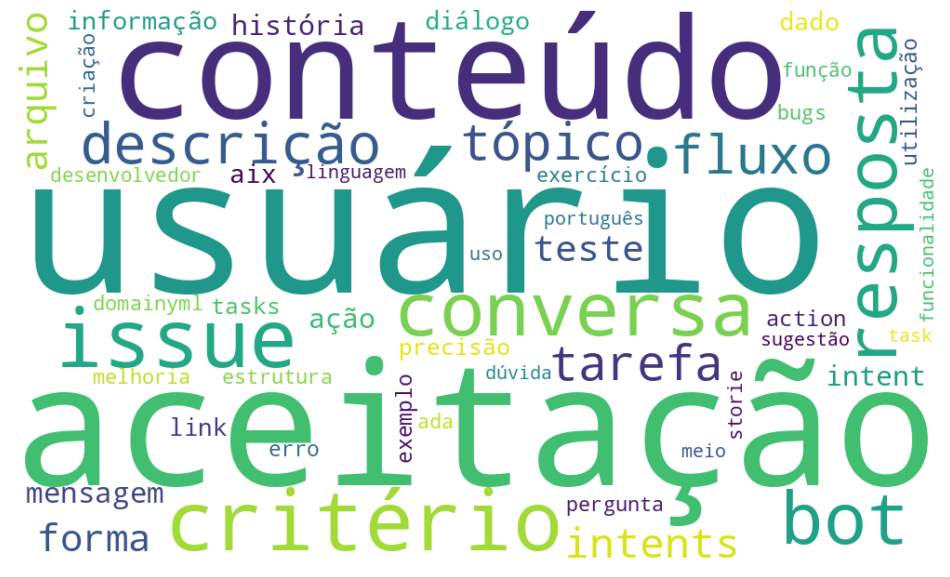

In [ ]:
generate_word_cloud(dict(counter_by_pos_tag('NOUN', 'lemma_').most_common(50)))

### Adjectives and Adverbs

In [ ]:
dict(counter_by_pos_tag('ADJ', 'lemma_').most_common(100))

{'capaz': 76,
 'critério': 70,
 'intents': 44,
 'desejo': 43,
 'presente': 37,
 'seguinte': 35,
 'novo': 33,
 'necessário': 32,
 'issue': 28,
 'tópico': 28,
 'tasks': 25,
 'bom': 25,
 'possível': 23,
 'python': 21,
 'estático': 15,
 'funcional': 15,
 'condicional': 12,
 'referente': 11,
 'intuitivo': 11,
 'natural': 11,
 'adequado': 10,
 'correto': 10,
 'tarefa': 10,
 'compreensível': 10,
 'constituinte': 10,
 'tarefo': 8,
 'extra': 8,
 'must': 8,
 'possivel': 8,
 'completo': 8,
 'principal': 7,
 'objetivo': 7,
 'bot': 7,
 'desnecessário': 6,
 'primeiro': 6,
 'story': 6,
 'disponível': 6,
 'template': 6,
 'task': 5,
 'existente': 5,
 'unitário': 5,
 'mesmo': 5,
 'último': 5,
 'correspondente': 5,
 'grande': 5,
 'pequeno': 5,
 'inicial': 5,
 'baixo': 5,
 'ponto': 5,
 'estimativo': 5,
 'fluxo': 5,
 'sequencial': 5,
 'breve': 5,
 'sucinto': 5,
 'determinado': 5,
 'interessante': 4,
 'estável': 4,
 'alto': 4,
 'arquivo': 4,
 'próximo': 4,
 'responsável': 4,
 'claro': 4,
 'simples': 4,
 'ra

In [ ]:
dict(counter_by_pos_tag('ADV', 'lemma_').most_common(100))

{'referente': 122,
 'não': 98,
 'mais': 51,
 'como': 34,
 'quando': 23,
 'corretamente': 17,
 'conforme': 10,
 'através': 9,
 'muito': 8,
 'então': 8,
 'assim': 8,
 'melhor': 7,
 'já': 7,
 'também': 6,
 'bem': 6,
 'dentro': 5,
 'apenas': 5,
 'atualmente': 3,
 'sempre': 3,
 'etc': 3,
 'novamente': 3,
 'devido': 3,
 'devidamente': 3,
 'acerca': 3,
 'somente': 2,
 'junto': 2,
 'tanto': 2,
 'perfeitamente': 2,
 'além': 2,
 'fora': 2,
 'bot': 2,
 'agora': 2,
 'mesmo': 2,
 'acima': 2,
 'anteriormente': 2,
 'sobre_jupyter': 2,
 'especificamente': 2,
 'talvez': 1,
 'comente': 1,
 'deploy': 1,
 'tal': 1,
 'claramente': 1,
 'sobretudo': 1,
 'condizente': 1,
 'aonde': 1,
 'frente': 1,
 'posteriormente': 1,
 'aix': 1,
 'bom': 1,
 'só': 1,
 'claro': 1,
 'caso': 1,
 'ainda': 1,
 'quanto': 1,
 'nem': 1,
 'brevemente': 1,
 'antes': 1,
 'sim': 1,
 'automaticamente': 1,
 'abaixo': 1,
 'aparentemente': 1}

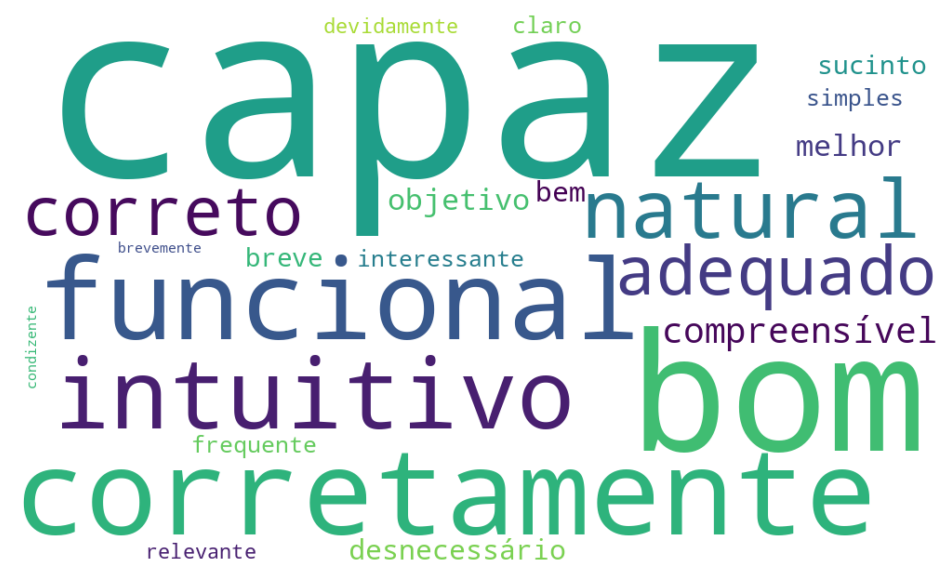

In [ ]:
adjectives = {
    'capaz': 76,
    'bom': 25,
    'funcional': 15,
    'intuitivo': 11,
    'natural': 11,
    'adequado': 10,
    'correto': 10,
    'compreensível': 10,
    'objetivo': 7,
    'desnecessário': 6,
    'breve': 5,
    'sucinto': 5,
    'interessante': 4,
    'claro': 4,
    'simples': 4,
    'frequente': 4,
    'relevante': 3,
}
adverbs = {
 'corretamente': 17,
 'melhor': 7,
 'bem': 6,
 'devidamente': 3,
 'condizente': 1,
 'brevemente': 1,
}
adjectives.update(adverbs)
generate_word_cloud(adjectives)

### Verbs

In [ ]:
dict(counter_by_pos_tag('VERB', 'lemma_').most_common(50))

{'dever': 232,
 'criar': 125,
 'responder': 94,
 'inserir': 94,
 'fazer': 66,
 'adicionar': 64,
 'realizar': 56,
 'melhorar': 55,
 'poder': 51,
 'documentar': 50,
 'reduzir': 45,
 'ter': 44,
 'saber': 40,
 'receber': 40,
 'refatorar': 40,
 'utter': 40,
 'explicar': 38,
 'utilizar': 36,
 'incluir': 32,
 'testar': 28,
 'levantar': 24,
 'analisar': 24,
 'consertar': 24,
 'tratar': 23,
 'deixar': 23,
 'telegr': 22,
 'apresentar': 21,
 'implementar': 21,
 'validar': 19,
 'funcionar': 19,
 'pesquisar': 19,
 'exibir': 19,
 'oferecer': 18,
 'definir': 18,
 'basear': 18,
 'ada': 17,
 'enviar': 17,
 'informar': 17,
 'conseguir': 17,
 'elaborar': 16,
 'ajustar': 16,
 'corrigir': 15,
 'cumprir': 15,
 'mostrar': 14,
 'entender': 14,
 'obter': 14,
 'usar': 14,
 'acertar': 14,
 'atualizar': 13,
 'passar': 13}

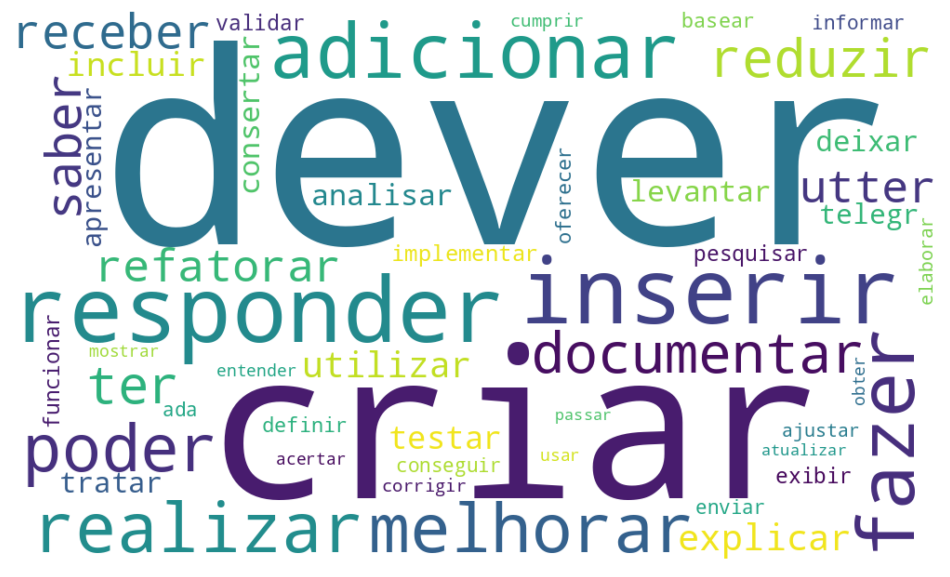

In [ ]:
generate_word_cloud(dict(counter_by_pos_tag('VERB', 'lemma_').most_common(50)))

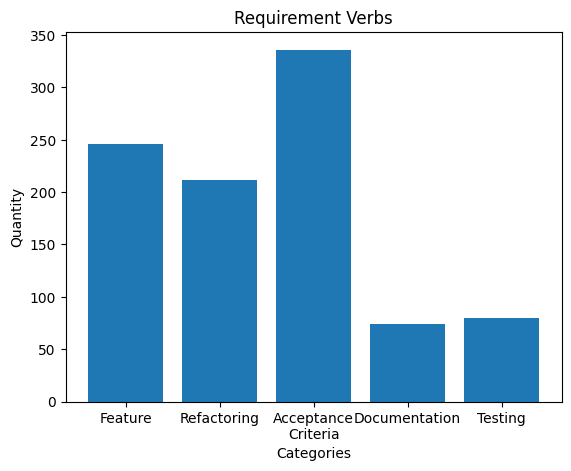

In [ ]:
nlp = spacy.load('pt_core_news_sm')

def group_verbs(verbs):
    groups = {
        'Feature': ['criar', 'desenvolver', 'implementar', 'adicionar', 'incluir'],
        'Refactoring': ['melhorar', 'otimizar', 'refatorar', 'reestruturar', 'corrigir', 'consertar', 'ajustar', 'atualizar', 'reduzir'],
        'Acceptance\nCriteria': ['dever', 'precisar', 'ter que', 'necessitar', 'cumprir', 'poder', 'entender', 'conseguir'],
        'Documentation': ['documentar', 'levantar'],
        'Testing': ['testar', 'validar', 'verificar', 'analisar']
    }
    grouped_verbs = {group: 0 for group in groups}

    for verb in verbs:
        for group, group_verbs in groups.items():
            for group_verb in group_verbs:
                if verb.lower() == group_verb:
                    grouped_verbs[group] += 1
                    break

    return grouped_verbs

combined_text = ' '.join(df_clean['Body'])

doc = nlp(combined_text)

verbs = [token.lemma_ for token in doc if token.pos_ == 'VERB']

grouped_verbs = group_verbs(verbs)

categories = grouped_verbs.keys()
quantities = grouped_verbs.values()

plt.bar(categories, quantities)
plt.xlabel('Categories')
plt.ylabel('Quantity')
plt.title('Requirement Verbs')
plt.show()
